In [ ]:
import pandas as pd
import requests
from tqdm import tqdm
import seaborn as sns

sns.set_theme(context="paper", style="whitegrid", palette="deep")

def get_govsg_df(dataset_id: str) -> pd.DataFrame:
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + dataset_id
    response = requests.get(url).json()
    records = response["result"]["records"]
    pbar = tqdm(total=response["result"]["total"], desc=response["result"]["resource_id"])
    pbar.update(len(response["result"]["records"]))
    while response["result"]["records"]:  # returns empty list after last row
        url = "https://data.gov.sg" + response["result"]["_links"]["next"]
        response = requests.get(url).json()
        records += response["result"]["records"]
        pbar.update(len(response["result"]["records"]))
    pbar.close()
    return pd.DataFrame(records)


df = get_govsg_df("d_ddfb18d19ea5f0bf83b7c50b35879209")
df.head()

d_ddfb18d19ea5f0bf83b7c50b35879209: 100%|██████████| 2007/2007 [00:09<00:00, 215.50it/s]


,_id,respondent_serial,respondent_id,country,yearbornin_1_slice,yearbornin_1_slice1,ageofrespondent,indicateage,gender,occstatus,...,ban_q30_4,ban_q32,ban_q431,ban_q432,ban_q433,ban_q434,ban_q435,ban_q436,ban_q437,md_segment
0,1,1184,GEN24_ 2833,Singapore,1961,60,60,55-64 years old,Female,Housewife / homemaker,...,T2B,Neutral,No,No,Yes,No,No,No,Yes,Loyal_betrayal
1,2,730,GEN24_.2328.,Singapore,1951,70,70,65 years old and above,Female,Employee (working full-time in private sector),...,T2B,Neutral,No,No,Yes,No,No,No,Yes,Harm_Care
2,3,15,GEN24_1001,Singapore,1983,38,38,35-44 years old,Male,Employee (working full-time in private sector),...,Neutral,B2B,No,No,No,Yes,No,Yes,No,Fairness_Cheating
3,4,18,GEN24_1002,Singapore,1955,66,66,65 years old and above,Male,Retiree,...,T2B,Neutral,No,No,Yes,No,No,Yes,No,Harm_Care
4,5,23,GEN24_1003,Singapore,1965,56,56,55-64 years old,Female,Housewife / homemaker,...,T2B,B2B,No,No,No,Yes,No,Yes,No,Purity_Degradation


In [2]:
df_desc = get_govsg_df("d_b961a43c2f66a144a9d9937e8d63f6dd")
df_desc.head()

d_b961a43c2f66a144a9d9937e8d63f6dd: 100%|██████████| 101/101 [00:00<00:00, 146.38it/s]


,_id,var_name,var_label
0,1,Respondent_Serial,Respondent Serial
1,2,Respondent_ID,Respondent ID
2,3,Country,Country
3,4,YEARbornin_1_slice,Q12. Which year were you born in? Please enter...
4,5,YEARbornin_1_slice1,Q12. Which year were you born in? Please enter...


In [3]:
df["ageofrespondent"] = df["ageofrespondent"].astype(int)

<Axes: xlabel='ageofrespondent', ylabel='Count'>

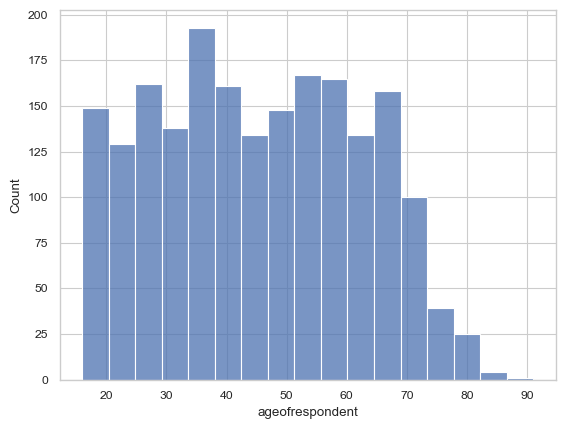

In [ ]:
sns.histplot(df, x="ageofrespondent")

Text(0.5, 1.0, 'As a citizen/resident,I will abide by government regulations in order to maintain peace & harmony in Singapore,even if not able to express I feel/want')

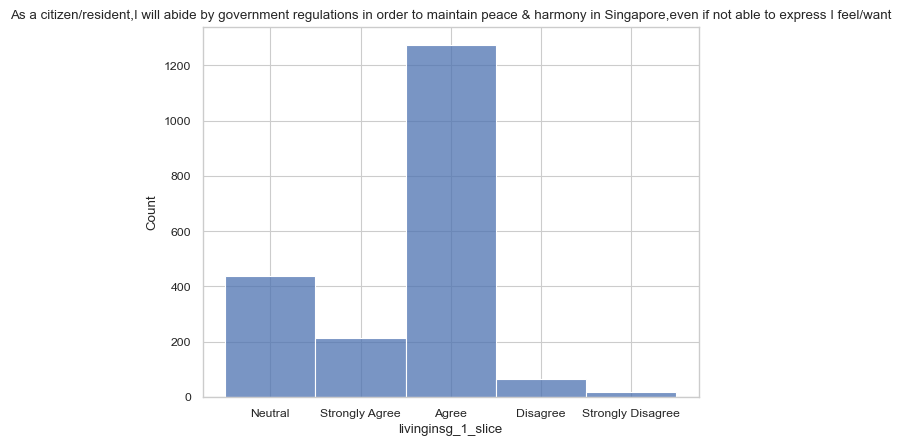

In [11]:
title = "As a citizen/resident,I will abide by government regulations in order to maintain peace & harmony in Singapore,even if not able to express I feel/want"
ax = sns.histplot(df, x="livinginsg_1_slice")
ax.set_title(title)

Text(0.5, 1.0, 'Do you have close friends who are of a different sexual orientation from you?')

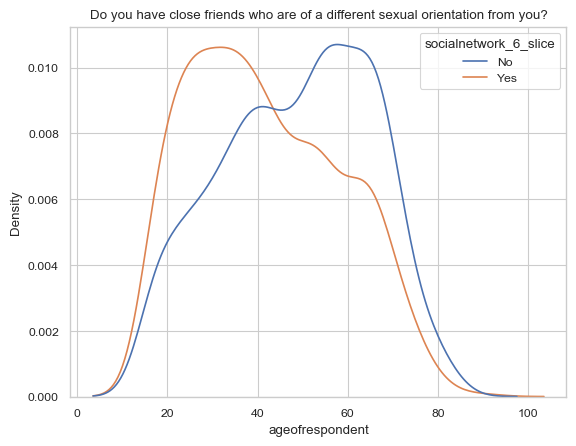

In [24]:
title = "Do you have close friends who are of a different sexual orientation from you?"
ax = sns.kdeplot(df, x="ageofrespondent", hue="socialnetwork_6_slice")
ax.set_title(title)

Text(0.5, 1.0, 'Do you have close friends who are of a different nationality from you?')

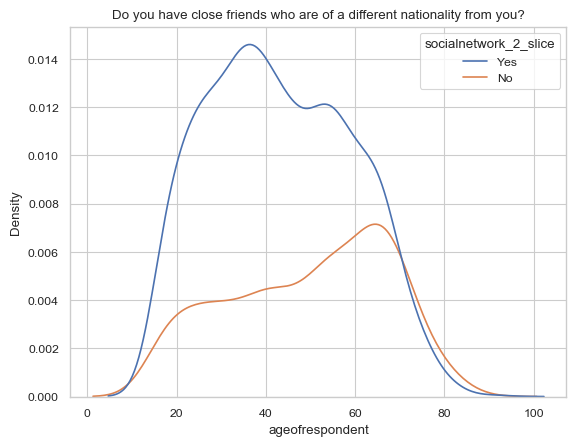

In [25]:
title = "Do you have close friends who are of a different nationality from you?"
ax = sns.kdeplot(df, x="ageofrespondent", hue="socialnetwork_2_slice")
ax.set_title(title)